## Music genre predictor

In [67]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree

In [81]:
music_data=pd.read_csv('music.csv')
# #split data into features and labels
X=music_data.drop(columns=['genre']) #features
y=music_data['genre'] #labels
# #split data into traing and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #20% data for testing from data set
# #model training
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#save model
 joblib.dump(model,'music-recommender.joblib')
#load saved model
model=joblib.load('music-recommender.joblib')

In [85]:
#make prediction
predictions=model.predict(X_test)
predictions

array(['Jazz', 'HipHop', 'HipHop', 'Acoustic'], dtype=object)

In [87]:
#check accuracy of model
score=accuracy_score(y_test,predictions)
score

1.0

[Text(0.625, 0.875, 'age <= 30.0\ngini = 0.724\nsamples = 14\nvalue = [2, 6, 3, 1, 2]\nclass = Classical'),
 Text(0.5, 0.625, 'age <= 25.5\ngini = 0.719\nsamples = 8\nvalue = [2, 0, 3, 1, 2]\nclass = Dance'),
 Text(0.25, 0.375, 'gender <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 1, 0]\nclass = Dance'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]\nclass = Dance'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]\nclass = HipHop'),
 Text(0.75, 0.375, 'gender <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 0, 0, 2]\nclass = Acoustic'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]\nclass = Acoustic'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2]\nclass = Jazz'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0]\nclass = Classical')]

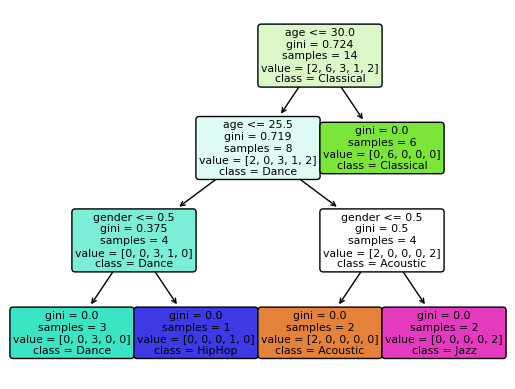

In [89]:
#visualize decision tree
#tree.export_graphviz(model,out_file='music_recom.dot',feature_names=['age','gender'],class_names=sorted(y.unique()),label='all',rounded=True,filled=True)
tree.plot_tree(model, feature_names = ['age', 'gender'],class_names = sorted(y.unique()),filled = True,rounded=True)